In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [2]:
df = pd.read_csv("uber_trips.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
df.isnull().sum()


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
df.dropna(inplace=True)


In [6]:
df.columns


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [7]:
df.columns


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [8]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')


In [9]:
df = df.dropna(subset=['START_DATE'])


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 1047
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  261 non-null    datetime64[ns]
 1   END_DATE    261 non-null    object        
 2   CATEGORY    261 non-null    object        
 3   START       261 non-null    object        
 4   STOP        261 non-null    object        
 5   MILES       261 non-null    float64       
 6   PURPOSE     261 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 16.3+ KB


In [11]:
df = df.dropna(subset=['START_DATE']).copy()


In [12]:
df.loc[:, 'hour'] = df['START_DATE'].dt.hour
df.loc[:, 'day'] = df['START_DATE'].dt.day
df.loc[:, 'weekday'] = df['START_DATE'].dt.day_name()
df.loc[:, 'month'] = df['START_DATE'].dt.month


In [13]:
df = df.dropna(subset=['START_DATE']).copy()

df['hour'] = df['START_DATE'].dt.hour
df['day'] = df['START_DATE'].dt.day
df['weekday'] = df['START_DATE'].dt.day_name()
df['month'] = df['START_DATE'].dt.month


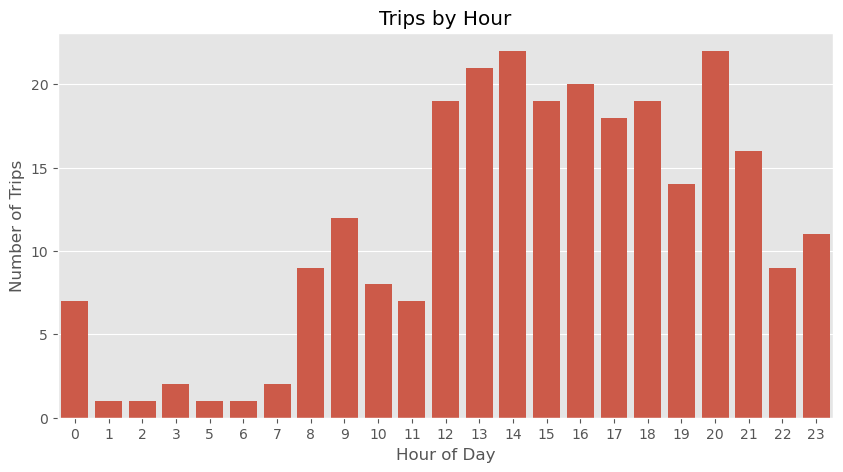

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df)
plt.title("Trips by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


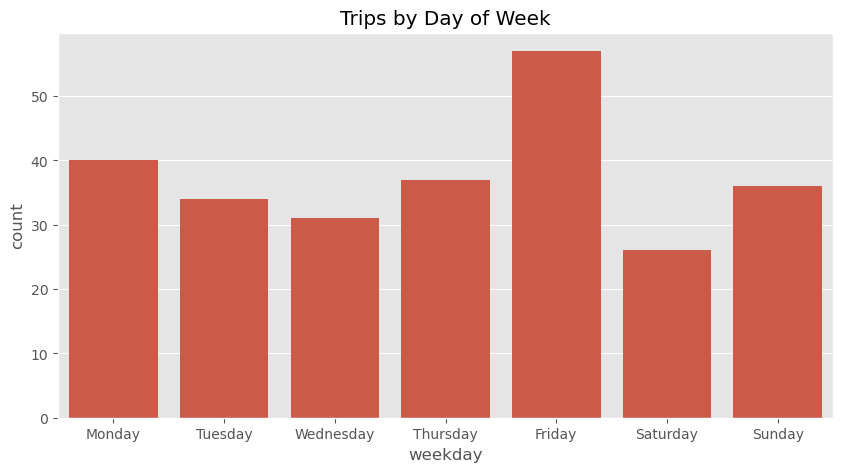

In [15]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10,5))
sns.countplot(x='weekday', data=df, order=order)
plt.title("Trips by Day of Week")
plt.show()


In [16]:
df['CATEGORY'] = df['CATEGORY'].fillna('Unknown')


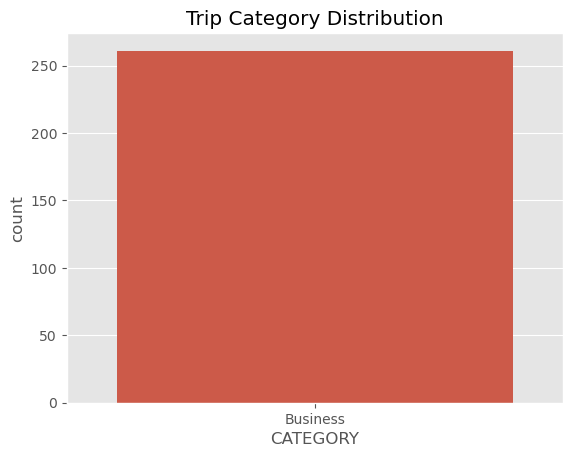

In [17]:
sns.countplot(x='CATEGORY', data=df)
plt.title("Trip Category Distribution")
plt.show()


In [18]:
df.columns = df.columns.str.lower()



In [19]:
df.columns = df.columns.str.lower()


In [20]:
df['start']
df['stop']
df['miles']
df['category']


0       Business
2       Business
3       Business
4       Business
5       Business
          ...   
1043    Business
1044    Business
1045    Business
1046    Business
1047    Business
Name: category, Length: 261, dtype: object

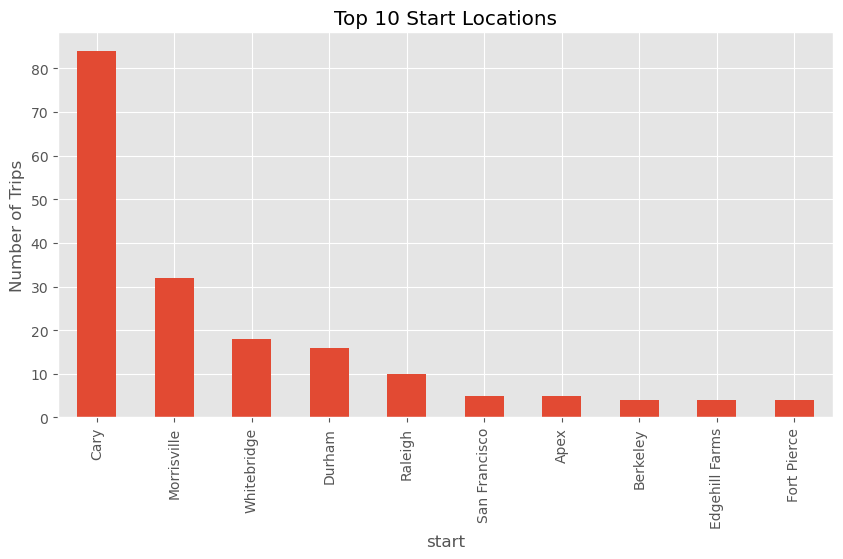

In [21]:
df['start'].fillna('Unknown').value_counts().head(10).plot(
    kind='bar', figsize=(10,5)
)
plt.title("Top 10 Start Locations")
plt.ylabel("Number of Trips")
plt.show()


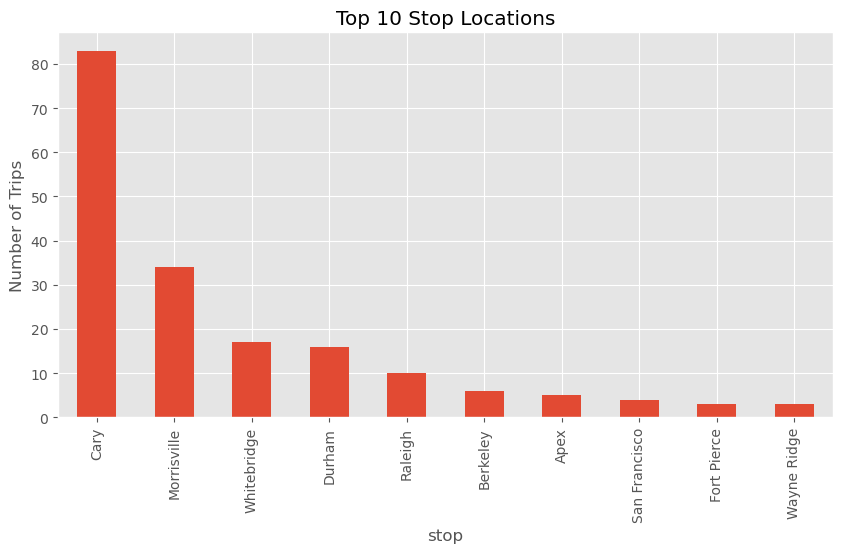

In [22]:
df['stop'].fillna('Unknown').value_counts().head(10).plot(
    kind='bar', figsize=(10,5)
)
plt.title("Top 10 Stop Locations")
plt.ylabel("Number of Trips")
plt.show()


## Key Insights

- Uber trips peak during weekday business hours, indicating work-related usage.
- Business category trips dominate overall usage compared to personal trips.
- Most rides are short-distance (under 10 miles).
- Meetings are the most common trip purpose.
- Certain start and stop locations are repeatedly used, indicating routine travel patterns.
